# Assignment 4: Convolutional Neural Networks
* Carboni Leonardo (0279048)
* Bais Giacomo (5355583)

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LayerNormalization

from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model, to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [53]:
def plot_loss(hist, model_name):
    plt.plot(hist.history['loss'], label="Train")
    plt.plot(hist.history['val_loss'], label="Validation")
    plt.title(f"{model_name} train and validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}.png")
    plt.show()
    return

# Data processing

In [54]:
# Load data
(x_train_and_val, y_train_and_val), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data in 0-1 range
x_train_and_val = x_train_and_val / 255.0
y_train_and_val = to_categorical(y_train_and_val)

x_test = x_test / 255.0
y_test = to_categorical(y_test)

In [55]:
# building a validation set (20% of the training set)
train_size = int(x_train_and_val.shape[0] * 0.8)
validation_size = x_train_and_val.shape[0] - train_size

x_validation, y_validation = (x_train_and_val[train_size:], y_train_and_val[train_size:])
x_train, y_train = (x_train_and_val[:train_size], y_train_and_val[:train_size])

In [56]:
img_width = 28
img_height = 28
num_classes = 10
channels = 1

# Baseline model
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. output

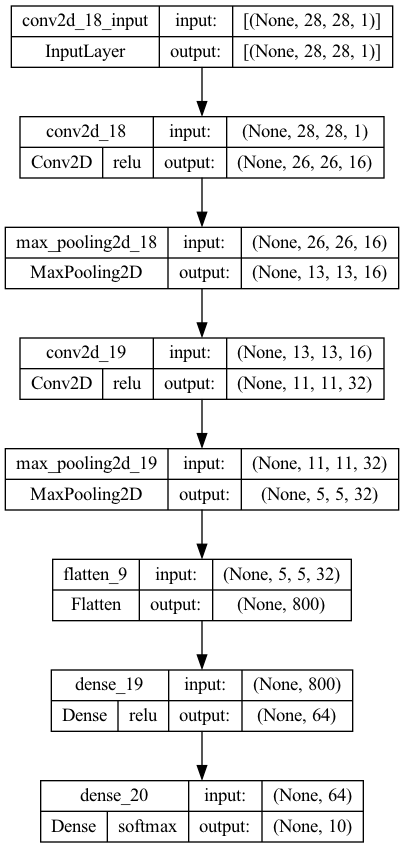

In [57]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_activations=True, to_file="./Models/baseline_model.png")

In [58]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.5300 - accuracy: 0.8098 - val_loss: 0.4051 - val_accuracy: 0.8537
Epoch 2/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3582 - accuracy: 0.8722 - val_loss: 0.3522 - val_accuracy: 0.8752
Epoch 3/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3139 - accuracy: 0.8865 - val_loss: 0.3262 - val_accuracy: 0.8818
Epoch 4/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2832 - accuracy: 0.8975 - val_loss: 0.2990 - val_accuracy: 0.8924
Epoch 5/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2616 - accuracy: 0.9049 - val_loss: 0.2951 - val_accuracy: 0.8898
Epoch 6/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2410 - accuracy: 0.9106 - val_loss: 0.2931 - val_accuracy: 0.8934
Epoch 7/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2235 - accuracy: 0.9177 - val_loss: 0.2951 -

In [59]:

print('\nValidation accuracy:', history.history['val_accuracy'][-1])

# in depth evaluation
predictions = model.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Validation accuracy: 0.9053333401679993
375/375 [==============================] - 1s 2ms/step
Precision:  0.9051518165438232
Recall:  0.9047873510202414


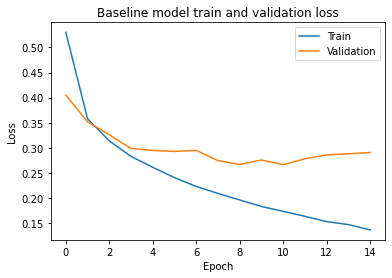

In [60]:
plot_loss(history, "Baseline model")

# Model 2: dropout layer
1. input
2. convolution
3. pooling
4. dropout
5. convolution
6. pooling
7. dropout
8. flatten
9. dense
10. dropout
11. output

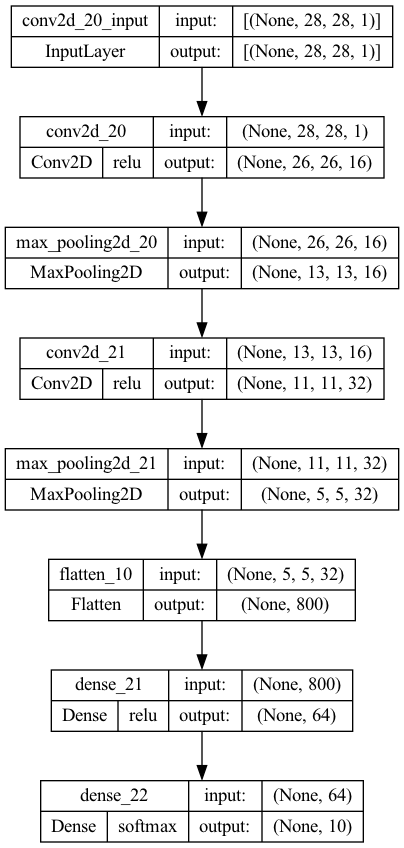

In [61]:
model2 = Sequential()
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model2, show_shapes=True, show_layer_activations=True, to_file="./Models/model2.png")

In [62]:
history2 = model2.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.5333 - accuracy: 0.8098 - val_loss: 0.4134 - val_accuracy: 0.8522
Epoch 2/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3571 - accuracy: 0.8726 - val_loss: 0.3382 - val_accuracy: 0.8795
Epoch 3/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3139 - accuracy: 0.8861 - val_loss: 0.3273 - val_accuracy: 0.8790
Epoch 4/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2810 - accuracy: 0.8990 - val_loss: 0.3052 - val_accuracy: 0.8857
Epoch 5/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2607 - accuracy: 0.9053 - val_loss: 0.2791 - val_accuracy: 0.8978
Epoch 6/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2412 - accuracy: 0.9126 - val_loss: 0.2876 - val_accuracy: 0.8984
Epoch 7/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2264 - accuracy: 0.9164 - val_loss: 0.2758 -

In [63]:
print('\nValidation accuracy:', history2.history['val_accuracy'][-1])

predictions = model2.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Validation accuracy: 0.906499981880188
375/375 [==============================] - 1s 2ms/step
Precision:  0.9067831809643732
Recall:  0.9064053121137761


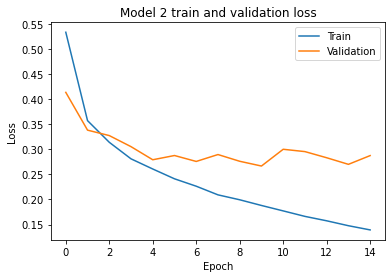

In [64]:
plot_loss(history2, "Model 2")

# Model 3: more neurons in the fully connected layer
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. dense
9. output

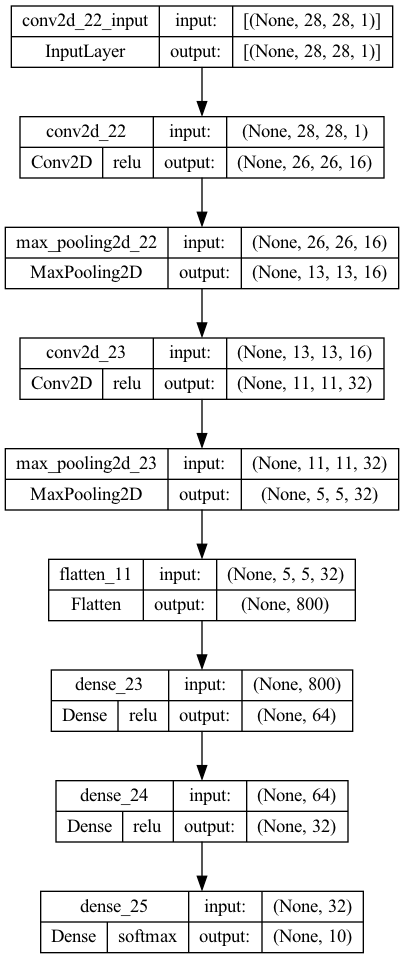

In [65]:
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model3, show_shapes=True, show_layer_activations=True, to_file="./Models/model3.png")

In [66]:
history3 = model3.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.5496 - accuracy: 0.8017 - val_loss: 0.4256 - val_accuracy: 0.8456
Epoch 2/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3701 - accuracy: 0.8682 - val_loss: 0.3888 - val_accuracy: 0.8619
Epoch 3/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3252 - accuracy: 0.8826 - val_loss: 0.3346 - val_accuracy: 0.8791
Epoch 4/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2945 - accuracy: 0.8926 - val_loss: 0.3040 - val_accuracy: 0.8898
Epoch 5/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2693 - accuracy: 0.9017 - val_loss: 0.3084 - val_accuracy: 0.8878
Epoch 6/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2513 - accuracy: 0.9073 - val_loss: 0.2831 - val_accuracy: 0.8956
Epoch 7/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2341 - accuracy: 0.9145 - val_loss: 0.2852 -

In [67]:
print('\nValidation accuracy:', history3.history['val_accuracy'][-1])

predictions = model3.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Validation accuracy: 0.9050832986831665
375/375 [==============================] - 1s 2ms/step
Precision:  0.9055196874016094
Recall:  0.9048704911941039


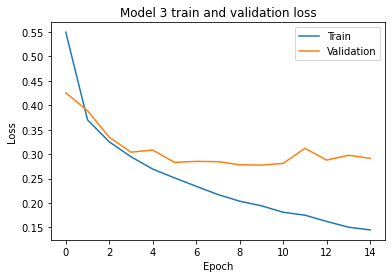

In [68]:
plot_loss(history3, "Model 3")

# Model 4: Layer Normalization
1. input
2. convolution
3. layer normalization
4. pooling
5. convolution
6. layer normalization
7. pooling
8. flatten
9. dense
10. output

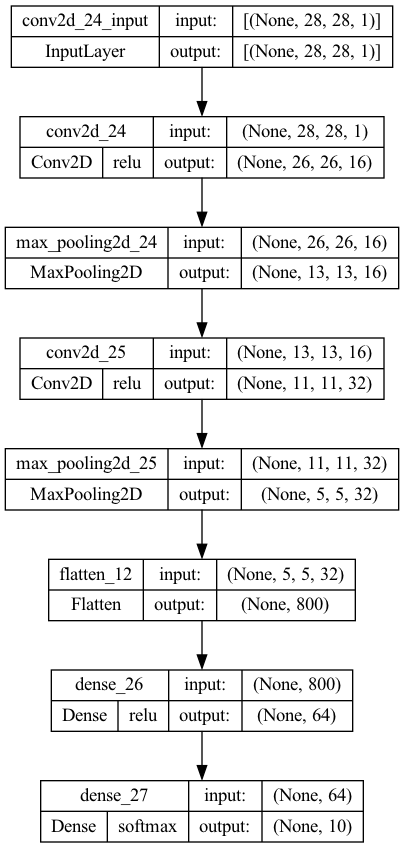

In [69]:
model4 = Sequential()
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model.add(LayerNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu'))
model.add(LayerNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model4, show_shapes=True, show_layer_activations=True, to_file="./Models/model4.png")

In [70]:
history4 = model4.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.5271 - accuracy: 0.8106 - val_loss: 0.4106 - val_accuracy: 0.8516
Epoch 2/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3565 - accuracy: 0.8725 - val_loss: 0.3419 - val_accuracy: 0.8758
Epoch 3/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3116 - accuracy: 0.8876 - val_loss: 0.3068 - val_accuracy: 0.8882
Epoch 4/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2811 - accuracy: 0.8976 - val_loss: 0.2992 - val_accuracy: 0.8889
Epoch 5/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2575 - accuracy: 0.9055 - val_loss: 0.3285 - val_accuracy: 0.8815
Epoch 6/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2379 - accuracy: 0.9121 - val_loss: 0.2716 - val_accuracy: 0.9003
Epoch 7/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2235 - accuracy: 0.9173 - val_loss: 0.2789 -

In [71]:
print('\nValidation accuracy:', history4.history['val_accuracy'][-1])

predictions = model4.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Validation accuracy: 0.9074999690055847
375/375 [==============================] - 1s 2ms/step
Precision:  0.9092001835341652
Recall:  0.9072367412565902


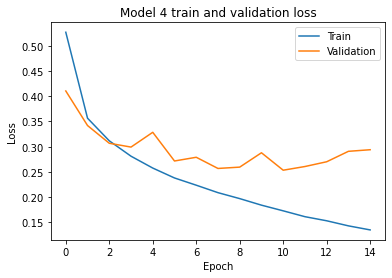

In [72]:
plot_loss(history4, "Model 4")

# Model 5: Lower Learning rate
Same as baseline model, but with a lower learning rate
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. output

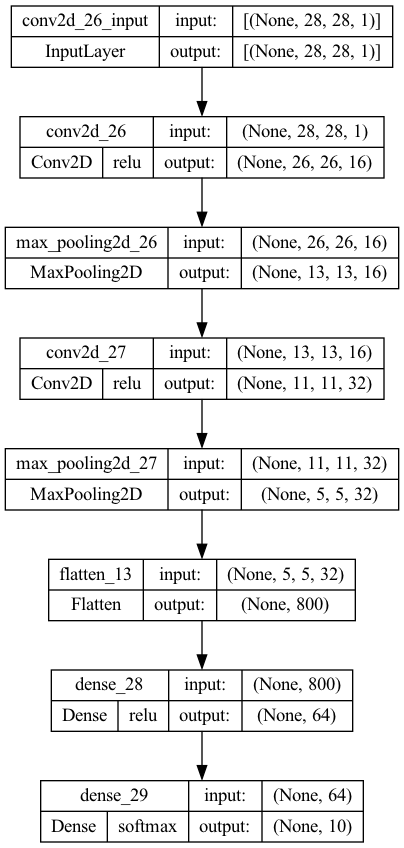

In [73]:
model5 = Sequential()
model5.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
plot_model(model5, show_shapes=True, show_layer_activations=True, to_file="./Models/model5.png")

In [74]:
history5 = model5.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.5939 - accuracy: 0.7901 - val_loss: 0.4321 - val_accuracy: 0.8432
Epoch 2/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3944 - accuracy: 0.8600 - val_loss: 0.3896 - val_accuracy: 0.8614
Epoch 3/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3500 - accuracy: 0.8746 - val_loss: 0.3721 - val_accuracy: 0.8680
Epoch 4/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3218 - accuracy: 0.8847 - val_loss: 0.3261 - val_accuracy: 0.8845
Epoch 5/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2984 - accuracy: 0.8926 - val_loss: 0.3338 - val_accuracy: 0.8812
Epoch 6/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2815 - accuracy: 0.8985 - val_loss: 0.3082 - val_accuracy: 0.8899
Epoch 7/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2639 - accuracy: 0.9056 - val_loss: 0.3086 -

In [75]:
print('\nValidation accuracy:', history5.history['val_accuracy'][-1])

predictions = model5.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Validation accuracy: 0.9104999899864197
375/375 [==============================] - 1s 2ms/step
Precision:  0.9102846129656796
Recall:  0.9098968795385829


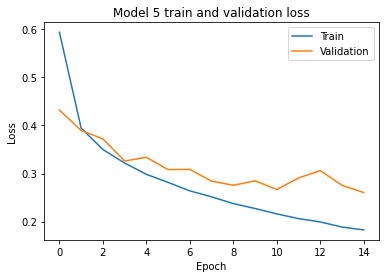

In [76]:
plot_loss(history5, "Model 5")

# Results

In [77]:
print(f"Baseline Validation accuracy: {history.history['val_accuracy'][-1]}")
print(f"Model 2 Validation accuracy: {history2.history['val_accuracy'][-1]}")
print(f"Model 3 Validation accuracy: {history3.history['val_accuracy'][-1]}")
print(f"Model 4 Validation accuracy: {history4.history['val_accuracy'][-1]}")
print(f"Model 5 Validation accuracy: {history5.history['val_accuracy'][-1]}")

Baseline Validation accuracy: 0.9053333401679993
Model 2 Validation accuracy: 0.906499981880188
Model 3 Validation accuracy: 0.9050832986831665
Model 4 Validation accuracy: 0.9074999690055847
Model 5 Validation accuracy: 0.9104999899864197


# Testing

Dropout model (best one)

In [78]:
print("Testing the dropout model (best model)")
_, test_acc = model2.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# in depth evaluation
predictions = model2.predict(x_test)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_t = np.argmax(y_test, axis=1)

print("Precision: ", precision_score(y_t, predictions, average='macro'))
print("Recall: ", recall_score(y_t, predictions, average='macro'))
print(confusion_matrix(y_t, predictions))


Testing the dropout model (best model)
313/313 - 3s - loss: 0.3025 - accuracy: 0.9015 - 3s/epoch - 9ms/step

Test accuracy: 0.9015000462532043
313/313 [==============================] - 1s 2ms/step
Precision:  0.9018228351816144
Recall:  0.9014999999999999
[[889   1  17  11   2   1  72   0   7   0]
 [  2 986   0   7   1   0   3   0   1   0]
 [ 23   1 853   9  41   0  71   0   2   0]
 [ 19  19   8 902  17   0  31   0   4   0]
 [  2   5  72  35 784   0  93   0   9   0]
 [  2   0   0   0   0 975   0  19   0   4]
 [135   3  59  25  51   0 722   0   5   0]
 [  0   0   0   0   0  11   0 977   0  12]
 [  4   1   4   1   1   3   3   3 979   1]
 [  1   0   0   0   0   4   0  47   0 948]]


Baseline model (second-best one)

In [79]:
print("Testing the baseline model (second best model)")

_, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis=1)
y_t = np.argmax(y_test, axis=1)

print("Precision: ", precision_score(y_t, predictions, average='macro'))
print("Recall: ", recall_score(y_t, predictions, average='macro'))
print(confusion_matrix(y_t, predictions))

Testing the baseline model (second best model)
313/313 - 2s - loss: 5.1513 - accuracy: 0.9001 - 2s/epoch - 6ms/step

Test accuracy: 0.90010005235672
313/313 [==============================] - 1s 3ms/step
Precision:  0.899589088622305
Recall:  0.9000999999999999
[[871   0  23  17   6   1  77   0   5   0]
 [  2 978   1  11   4   0   3   0   1   0]
 [ 15   0 878   9  48   0  48   0   2   0]
 [ 21   3  16 900  34   1  21   0   4   0]
 [  1   1  72  23 839   0  62   0   2   0]
 [  0   0   0   0   0 989   0   7   0   4]
 [143   3  78  25  76   0 665   0  10   0]
 [  0   0   0   0   0  18   0 932   0  50]
 [  4   0   4   5   3   3   1   3 977   0]
 [  1   0   0   0   0   5   0  22   0 972]]


In [80]:
# saving the model's weights
model.save_weights('./Models/model_weights.h5')
model2.save_weights('./Models/model2_weights.h5')
model3.save_weights('./Models/model3_weights.h5')
model4.save_weights('./Models/model4_weights.h5')
model5.save_weights('./Models/model5_weights.h5')


# Choice 6: Using another dataset

In [81]:
import pandas as pd
import cv2 as cv
import os

In [87]:
df = pd.read_csv('archive/styles.csv', error_bad_lines=False)

# filter out columns that are not 'id' nor 'articleType'
df = df.filter(items=['id', 'articleType'])

conversion = {
    "Tshirts": 0,
    "Tops": 0,
    "Lounge Tshirts": 0,
    "Jeans": 1,
    "Track Pants": 1,
    "Trousers": 1,
    "Lounge Pants": 1,
    "Leggings": 1,
    "Rain Trousers": 1,
    "Sweaters": 2,
    "Dresses": 3,
    "Waistcoat": 4,
    "Rain Jacket": 4,
    "Jackets": 4,
    "Nehru Jackets": 4,
    "Sandals": 5,
    "Sports Sandals": 5,
    "Shirts": 6,
    "Sweatshirts": 6,
    "Casual Shoes": 7,
    "Sports Shoes": 7,
    "Handbags": 8,
    "Duffel Bag": 8,
    "Booties": 9,
}

<ipython-input-87-4f59c02ffa9b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('archive/styles.csv', error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33020: expected 10 fields, saw 11

In [83]:
def preprocess_image(image_path):
    # Load the image
    image = cv.imread(image_path)
    height, width = image.shape[:2]
    aspect_ratio = float(width) / float(height)

    # background removal
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ret, mask = cv.threshold(gray, 240, 255, cv.THRESH_BINARY)
    mask = cv.bitwise_not(mask)
    result = cv.bitwise_and(gray, gray, mask=mask)
    # Replace the background with black
    result[mask == 0] = 0

    # calculating the new dimensions for 28x28 while maintaining the aspect ratio
    if aspect_ratio > 1:
        new_width = 28
        new_height = int(round(new_width / aspect_ratio))
    else:
        new_height = 28
        new_width = int(round(new_height * aspect_ratio))

    # resizing the image using the calculated dimensions
    resized_img = cv.resize(result, (new_width, new_height), interpolation=cv.INTER_AREA)

    # adding padding to make the image 28x28
    padding_x1 = (28 - new_width) // 2
    padding_y1 = (28 - new_height) // 2
    padding_x2 = 28 - new_width - padding_x1
    padding_y2 = 28 - new_height - padding_y1

    resized_img = cv.copyMakeBorder(resized_img, padding_y1, padding_y2, padding_x1, padding_x2, cv.BORDER_CONSTANT)

    # normalization
    normalized_image = resized_img / 255.0

    return normalized_image

In [88]:
x_other = []
y_other = []
for i in range(len(df)):
    id_item = df.iloc[i, 0]
    articleType = df.iloc[i, 1]
    img_path = f'archive/images/{id_item}.jpg'
    exists = os.path.isfile(img_path)
    if articleType in conversion and exists:
        x_other.append(preprocess_image(f'archive/images/{id_item}.jpg'))
        y_other.append(conversion[articleType])

x_other = np.array(x_other)
y_other = to_categorical(np.array(y_other))

## Validating and testing on the other dataset

In [91]:
print('\nValidation accuracy:', history.history['val_accuracy'][-1])

predictions = model.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))
# testing

test_loss, test_acc = model.evaluate(x_other, y_other, verbose=2)

print('\nTest accuracy:', test_acc)

# in depth evaluation
predictions = model.predict(x_other)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_other, axis=1)

confusion_matrix(y_test, predictions)

print("Precision: ", precision_score(y_test, predictions, average='macro'))
print("Recall: ", recall_score(y_test, predictions, average='macro'))


Validation accuracy: 0.9053333401679993
375/375 [==============================] - 1s 2ms/step
Precision:  0.9051518165438232
Recall:  0.9047873510202414
712/712 - 3s - loss: 8.6512 - accuracy: 0.2397 - 3s/epoch - 5ms/step

Test accuracy: 0.239650160074234
712/712 [==============================] - 2s 3ms/step
Precision:  0.27009092727451034
Recall:  0.2526849171475507


In [92]:
occurrences = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i, p in enumerate(predictions):
    if p != y_test[i]:
        occurrences[y_test[i]] += 1

percentages = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
    percentages[i] = occurrences[i] / np.sum(y_test == i)
print(percentages)

[0.8181406409240176, 0.582639714625446, 0.9711191335740073, 0.5237068965517241, 0.8108108108108109, 0.8506224066390041, 0.876, 0.8322065150583897, 0.20790471034109367, 1.0]
